In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [3]:
inc=pd.read_csv('DS2_C6_S1_Income_Data_Challenge.csv')
inc.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [4]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
inc.shape

(32561, 14)

In [7]:
inc.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
inc.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

<AxesSubplot:>

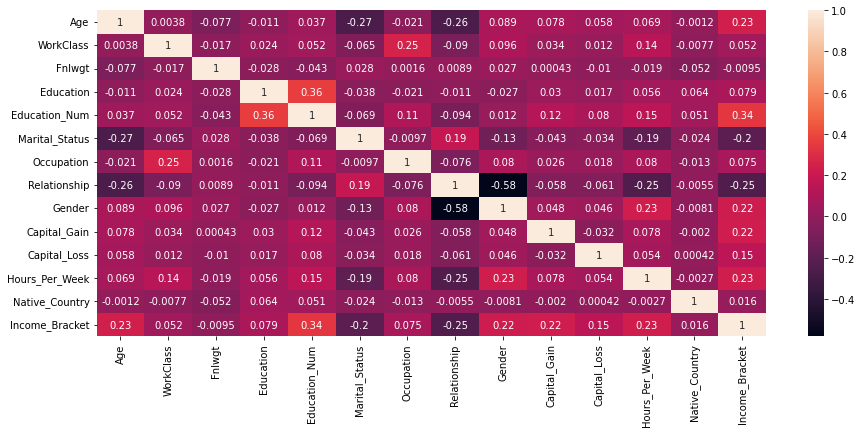

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(inc.corr(),annot=True)

In [11]:
cat=list(inc.select_dtypes(include='object').columns)
cat

['WorkClass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Gender',
 'Native_Country',
 'Income_Bracket']

In [14]:
for i in cat:
    inc[i]=preprocessing.LabelEncoder().fit_transform(inc[i])
    inc[i].astype('category')

In [16]:
inc[i].astype('object')

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income_Bracket, Length: 32561, dtype: object

In [18]:
inc

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,1,0,0,20,39,0


In [28]:
X=inc.drop(['Income_Bracket','Fnlwgt'],axis=1)
y=inc['Income_Bracket']

In [29]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [32]:
acc=[]
ai=0
n=0
for i in range(1,31):
    knni = KNeighborsClassifier(n_neighbors = i)
    knni.fit(X_train,y_train)
    y_pred=knni.predict(X_test)
    acci=accuracy_score(y_test,y_pred)
    if acci>ai:
        ai=acci
        n=i
    acc.append(1-accuracy_score(y_test,y_pred))
print('The best value for k is',n,'and the error for that k is',1-ai)    

The best value for k is 17 and the error for that k is 0.1596806387225549


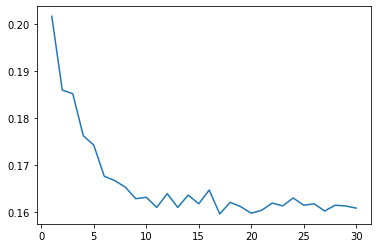

In [33]:
plt.plot(list(range(1,31)),acc)

In [34]:
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8403193612774451

In [37]:
y_wrong=[]
y_right=[]
for i in range(len(y_test)):
    if y_test.iloc[i]!=y_pred[i]:
        y_wrong.append((y_pred[i],y_test.iloc[i]))
    else:
        y_right.append((y_pred[i],y_test.iloc[i]))
len(y_right),len(y_wrong)
y

(5473, 1040)